# 1. 데이터 전처리
## 1) 데이터 전처리
> 데이터 훈련 전, 데이터를 가공하는 단계 

## 2) 표준 점수
> 훈련 세트의 스케일을 바꾸는 방법 중하나, 표준화 과정을 거침 
- 표준화 방법 : 특성 - 평균 / 표준편차 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Matplotlib의 전역 폰트 설정
plt.rc('font', family='Pretendard')

# 마이너스 부호가 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)


# 2. 데이터 선언 및 정리

## 1) 넘파이로 데이터 준비 
- `np.column_stack((리스트1, 리스트2))` : 리스트를 2차원 행렬로 바꿈 
  - 단, 연결할 리스트는 `튜플`로 전달 

- 물고기 분류 : 도미 35마리 + 빙어 14마리 

In [16]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


## 2) 정답 데이터 (=타겟 데이터) 만들기 
- `np.ones()` 와 `np.zero()` 함수를 이용함 
  - ones(n) : 1을 n개 생성
  -  zero(n) : 0을 n개 생성
   
- 1이면 도미  0이면 빙어

  

In [17]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 3) 훈련세트와 테스트 세트 나누기 by sklearn
- `train_test_split`: 데이터를 훈련세트와 테스트 세트로 나눔 
- train_test_split(데이터, 타겟데이터)

In [18]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target)

### 2차원 배열 
print("input : ",train_input.shape, test_input.shape)
### 1차원 배열 
print(f"target : {train_target.shape} , {test_target.shape}")

input :  (36, 2) (13, 2)
target : (36,) , (13,)


# 3. 예측 실패 원인 찾기 
- [25,150] 을 넣으면 어떤 값이 나올 것인가 ? 

## 1) 학습을 통한 예측 테스트 

In [ ]:
### kn모델 객체 선언 
kn = KNeighborsClassifier()
### 학습 
kn.fit(train_input,train_target)
### 평가 
print("모델 평가 결과 : ", kn.score(test_input,test_target))
print("모델 예측 결과 : ",kn.predict([[25, 150]])) # type: ignore
print("실제 타깃 값 : 1")

모델 평가 결과 :  1.0
모델 예측 결과 :  [0.]
실제 타깃 값 : 1


## 2) 시각화를 통한 데이터 확인

- 정확하지 않은 이유 
  - k-최근접 알고리즘은 주변에 있는 `이웃`을 기준으로 함 
  - 가장 까까운 이웃을 빙어로 판단함 

In [ ]:
### 25,150와 가까운 이웃 5개를 리스트로 받음 
distances, indexes = kn.kneighbors([[25,150]]) # type: ignore

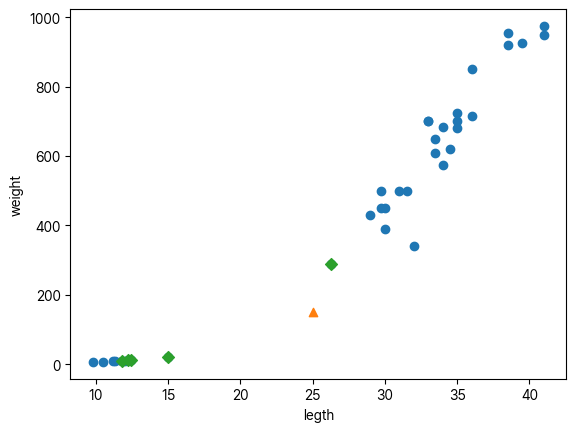

In [21]:
### 전체 데이터 : x축 : 길이 / y축 무게 
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker="^")
### 최근접 이웃 데이터 
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")
plt.xlabel("legth")
plt.ylabel("weight")
plt.show()

## 3) 실제 데이터 보기 
   - 실제 데이터의 정답 데이터가 무엇인지 확인 
   - 대다수 빙여(0)로 유추 

In [22]:
print(f"targe_input : {[train_input[indexes]]}")
print(f"targe_input : {[train_target[indexes]]}")

targe_input : [array([[[ 15. ,  19.9],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ],
        [ 11.8,  10. ]]])]
targe_input : [array([[0., 0., 0., 1., 0.]])]


# 4. 데이터 전처리 
## 1) 데이터가 다른 이유
- 데이터간 `스케일(Scale)`이 다름 
  - 두 특성 간 수치의 범위가 매우 다름 
  - 정확한 예측을 하기 위해 특성값을 일정한 기준으로 맞춰야함 > `데이터 전처리`

## 2) 표준점수(z점수)를 이용한 표준화 
- $\text{표준 점수} = Z = \frac{X - \mu}{\sigma}$ 
- 특성값 $X$에서  평균 $\mu$을 빼고 표준편차 $\sigma$ 로 나눈 것


## 3) 파이썬으로 표준화 구현
  - 넘파이를 이용해 평균과 표준편차를 구함 
  - 평균 : `np.mean`
  - 표준편차 : `np.std`
  - `axis=0` : 열

- 평균과 표준 편차 만들기 

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(f"평균 : {mean} , 표준편차 : {std}")

평균 : [ 27.72777778 469.21944444] , 표준편차 : [ 10.38729489 329.28075645]


- 표준화 

In [26]:
train_scaled = (train_input - mean) / std

# 4. 전처리된 모델로 예측 

In [ ]:
### 테스트 데이터도 표준화 
test_scaled = (test_input - mean ) / std 

### 넣어야 하는 데이터도 표준화 
### 브로드 캐스트 되어서 하나씩 안해도 됨 
new = ([25,150]-mean)/ std

### 모델 학습 
kn.fit(train_scaled, train_target)

### 모델 평가 
print(f"모델 평가 : {kn.score(test_scaled, test_target)}")

### 예측 평가 - 2차원 데이터를 줘야해서 [ ]로 묶음 
print(f"예측 평가 : {kn.predict([new])}")

모델 평가 : 1.0
예측 평가 : [1.]
